# Lagrange Points

*Colin Leach, Oct 2018*

## Contents

- [Introduction](#intro)
- [Interactive 2D plot](#2d)
- [3D plot](#3d)
- [Roche lobes](#roche)
- [References](#refs)

<a id='intro'></a>

## Introduction

The Lagrange points are an example of the restricted 3-body problem. When two massive bodies $m_1$ and $m_2$ are in *circular* orbits around their center of mass, calculations in the rotating reference frame identify stationary points in the gravitational field where (much less massive) test particles have zero acceleration. These are the 5 Lagrange points.

### Rotating reference frame

We need to transform the $x,y$ coordinates of the orbital plane to a center of mass (CoM) frame $x', y'$, rotating such that $m_1$ and $m_2$ remain on the $x'$ axis. Because we are restricting the analysis to circular orbits, the angular frequency $\omega$ is constant. We also define an angular frequency vector $\Omega = \omega \mathbf{\hat{z}}$ that points along the rotation axis.

The velocity of a point with position vector $\mathbf{r}$ transorms as 
$$ \mathbf{v}_{fixed} = \mathbf{v}_{rot} + \Omega \times \mathbf{r} $$
Taking the time derivative of this gives
$$ \mathbf{\dot{v}}_{fixed} = \mathbf{\dot{v}}_{rot}\ +\ \Omega \times \mathbf{v}_{rot}\ +\ \dot{\Omega} \times \mathbf{r}\ +\ \Omega \times \mathbf{\dot{r}}_{rot}\ +\ \Omega \times (\Omega \times \mathbf{r}) $$
But $\mathbf{\dot{v}} = \mathbf{a}$ and $\mathbf{\dot{r}} = \mathbf{v}$, so this simplifies to
$$ \mathbf{a}_{fixed} = \mathbf{a}_{rot}\ +\ \Omega \times (\Omega \times \mathbf{r})\ +\ 2\Omega \times \mathbf{v}_{rot}\ +\  \dot{\Omega} \times \mathbf{r} $$

### Application to the gravitational 3-body problem

Because $\dot{\Omega} = 0$ and $\Omega$ is perpendicular to to orbital plane including $\mathbf{r}$, we can simplify further. Also, we define $\mathbf{F}_{true} = m\ \mathbf{a}_{fixed}$ and $\mathbf{F}_{eff} = m\ \mathbf{a}_{rot}$
$$ \mathbf{F}_{true} = \mathbf{F}_{eff}\ -\ \underbrace{\omega^2 \mathbf{r}}_{centrifugal}\ +\ \underbrace{2\Omega \times \mathbf{v}_{rot}}_{Coriolis}  $$
Finally, assume that the Coriolis term is usually small enough to ignore in systems like this. Then our effective force is 
$$ \mathbf{F}_{eff} = \mathbf{F}_{true}\ +\ \omega^2 \mathbf{r} $$

The effective potential is 
$$ \Phi_{eff} = \frac{U_{eff}}{m} = -\frac{1}{m} \int \mathbf{F}_{eff} \cdot d \mathbf{r} = -\frac{1}{m} \int \mathbf{F}_{true} \cdot d \mathbf{r} - \int \omega^2 \mathbf{r} \cdot d \mathbf{r} = \Phi_{true} - \frac{1}{2} \omega^2 r^2 $$

If the position vectors to $m_1$ and $m_2$ are $\mathbf{r}_1$ and $\mathbf{r}_2$, this becomes
$$ \Phi_{eff} = -\frac{G m_1}{|\mathbf{r} - \mathbf{r}_1|} -\frac{G m_2}{|\mathbf{r} - \mathbf{r}_2|} - \frac{1}{2} \omega^2 r^2 $$

The rest of this notebook calculates contours for $\Phi_{eff}$. In particular, the **Lagrange points** are the 5 points where $\nabla \Phi_{eff} = 0$.

<a id='2d'></a>

## Interactive 2D plot

In [1]:
# matplotlib notebook supports 3D rotation, unlike matplotlib inline
# but it causes other problems
# %matplotlib notebook

%matplotlib inline

import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# from IPython.display import Image, HTML, display, clear_output
# from matplotlib.offsetbox import AnchoredText

from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Output
import ipywidgets as w

from scipy.optimize import brentq

Start by setting up a calculation of the coordinates of L1-L5. Note that the calculation is essentially dimensionless: $m_1$ and $m_2$ are 1 arbitrary unit apart (so $a = 1$), and only the relative masses are specified. The parameter `mu` is the fraction of the total mass in $m_2$, so:
$$ \mu = \mu_2 = \frac{m_2}{m_1+m_2} \quad \text{and} \quad \mu_1 = 1 - \mu_2 $$
This is not the same as the reduced mass, usually called $\mu$ in other contexts.

L4 and L5 are easy, as they form equilateral triangles with $m_1$ and $m_2$. L1-L3 all lie along a line through $m_1$ and $m_2$, so in our coordinates $y=0$. Finding the $x$-coordinate is much more complicated and best done digitally: `scipy.optimize.brentq` seems to work well.

In [2]:
def location(mu):
    mu1 = 1 - mu
    mu2 = mu
    
    # r1 and r2 will be close to r10 and r20 respectively.
    # Some solvers need this guidance (e.g. Mathematica's FindRoot)
    # We use brentq here, which only needs an interval spanning a sign change
#     alpha = (mu/(3*(1-mu)))**(1/3)
#     beta = -(7/12)*(mu2/mu1) + (7/12)*(mu2/mu1)**2
#     r10 = 1 + beta
#     r20 = alpha - (1/3)*alpha**2 - (1/9)*alpha**3
    
    points = {}
    
    # L1
    def lageq1(r2):
        return mu1*(1 - r2 - 1/(1-r2)**2) - mu2*(r2 - 1/r2**2)
    r2 = brentq(lageq1, 0.001, 0.999)
    x = mu1 - r2
    points['L1'] = (x, 0)
    
    # L2
    def lageq2(r2):
        return mu1*(1 + r2 - 1/(1+r2)**2) + mu2*(r2 - 1/r2**2)
    r2 = brentq(lageq2, 0.001, 0.999)
    x = mu1 + r2
    points['L2'] = (x, 0)
    
    # L3
    def lageq3(r1):
        return mu1*(r1 - 1/r1**2) + mu2*(1 + r1 - 1/(1+r1)**2)
    r1 = brentq(lageq3, 0.001, 0.999)
    x = -mu2 - r1
    points['L3'] = (x, 0)
    
    # L4
    x = 0.5 - mu2
    y = np.sqrt(3)/2
    points['L4'] = (x, y)
    
    # L5
    x = 0.5 - mu2
    y = -np.sqrt(3)/2
    points['L5'] = (x, y)
    
    return points # as (x,y) tuples

The Mathematica code published by Murray and Dermott uses $\mu = 0.2$ in all its calculations. Let's check that our Python function gives the same coordinate values (it does).

In [3]:
mu = 0.2
pts = location(mu)
print(pts)

{'L1': (0.4380759585384487, 0), 'L2': (1.2710486907395575, 0), 'L3': (-1.0828394642022834, 0), 'L4': (0.3, 0.8660254037844386), 'L5': (0.3, -0.8660254037844386)}


Now define a function `czv` that returns the value of the Jacobi constant of the zero velocity curve at the point $(x,y)$. Murray and Dermott explain this in (sometimes bewildering) detail, but essentially we are talking about levels in the gravitational field $\Phi$.

In [4]:
def czv(pt, mu):
    x, y = pt
    return 2*((x**2+y**2)/2 + mu/np.sqrt((-1+mu+x)**2 + y**2) + (1-mu)/np.sqrt((mu+x)**2 + y**2))

Define a plotting routine that takes `mu` as a parameter. This needs to be in a function so it can be hooked to interactive widgets.

The ColorMap isn't ideal, but at least it doesn't try to plot lines in white on a white background (as several alternatives do).

In [65]:
def fix_mu(mu):
    # mu close to 0 or 0.5 will break the calculation, so add a small shift
    # mu > 0.5 merely flips the plot horizontally and isn't interesting
    if mu < 0.01:
        mu = 0.01
    elif mu > 0.49:
        mu = 0.49
    return mu

def plotContours(mu):
    mu = fix_mu(mu)
            
    #calculate the coordinates of L1-L5
    pts = location(mu)
    
    # calculate levels for plotting
    c1 = czv(pts['L1'], mu)
    c2 = czv(pts['L2'], mu)
    c3 = czv(pts['L3'], mu)
    levels = [c1,c2,c3]
    levels.sort() # contour plot needs these in ascending order
    
    # set up a meshgrid for the plot
    delta = 0.005
    x = np.arange(-2.0, 2.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = czv((X, Y), mu)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
#     plt.axis('equal')
    
    # create the contour plot
#     CS = ax.contour(X, Y, Z, levels, cmap=cm.brg)
    CS = ax1.contour(X, Y, Z, levels, cmap=cm.copper)
    
    # add bodies (yellow-ish)
    ax1.plot(-mu, 0,'yo',markersize=20)
    ax1.text(-mu,0.1,'m1')
    ax1.plot(1-mu, 0,'yo',markersize=20)
    ax1.text(1-mu,0.1,'m2')
    
    # add L1-L5 (black)
    for pt in pts:
        x,y = pts[pt]
        ax1.plot(x,y,'ko',markersize=10)
        ax1.text(x+0.08,y,pt)
        
    ax1.set_title('Lagrange points and zero-value contours, $\mu$ = %.2f'%(mu,), fontsize=16);
    ax1.set_xlabel('x', fontsize=16)
    ax1.set_ylabel('y', fontsize=16)
    
    # create the cross-section plot
    x = np.arange(-2.0, 2.0, delta)
    z = -czv((x,0), mu)
#     print(np.min(z), np.max(z))
    ax2.plot(x, z)
    ax2.set_ylim(top=0, bottom=-10)
        
    ax2.set_title('Cross section on line through stars', fontsize=16);
    ax2.set_xlabel('x', fontsize=16)
    ax2.set_ylabel('$\Phi_{eff}$', fontsize=16)
    
    # add L1-L5 (black)
    cs = [c1,c2,c3]
    for pt in [1,2,3]:
        Lpt = 'L'+str(pt)
        x,_ = pts[Lpt]
        y = -cs[pt-1]
        ax2.plot(x,y,'ko',markersize=10)
        ax2.text(x+0.08,y+0.1,Lpt)


Use a slider widget to set `mu` and create the plots. 

In [66]:
interact(plotContours, mu=w.FloatSlider(description="$\mu$",
                                            min=0.0, max=0.5, step=0.01, 
                                            continuous_update=False,
                                            value=0.2));

interactive(children=(FloatSlider(value=0.2, continuous_update=False, description='$\\mu$', max=0.5, step=0.01…

**Left-hand plot** shows contours of $\Phi_{eff}$ in the orbital plane.

**Right-hand plot** shows a cross section at $y=0$, the line through the two bodies. The gravitational potential tends to $-\infty$ close to the two stars, so the vertical axis is heavily truncated. The L1-L3 points are the stationary points where $\nabla \Phi_{eff} = 0$.

<a id='3d'></a>
## 3-D Plot

TODO - Getting a good surface plot is still very much a work in progress.

In [7]:
def plotSurface(mu):
    mu = fix_mu(mu)
            
    #calculate the coordinates of L1-L5
    pts = location(mu)
    
    # calculate levels for plotting
    c1 = czv(pts['L1'], mu)
    c2 = czv(pts['L2'], mu)
    c3 = czv(pts['L3'], mu)
#     levels = [c1,c2,c3]
#     levels.sort() # contour plot needs these in ascending order
    
    # set up a meshgrid for the plot
    delta = 0.005
    x = np.arange(-2.0, 2.0, delta)
    y = np.arange(-2.0, 2.0, delta)
    X, Y = np.meshgrid(x, y)
    Z = -czv((X, Y), mu)
    Z[Z<-3.85] = -3.85
    
    # create the contour plot
    fig = plt.figure(figsize=(5,5))
    ax = Axes3D(fig)
#     plt.axis('equal')
#     CS = ax.contour(X, Y, Z, levels, cmap=cm.brg)
    CS = ax.plot_surface(X, Y, Z, cmap=cm.Greys)
    ax.set_zlim(-3.85,-2.5)
    ax.vmin = -3.8
    ax.vmax = -2.0
    
    print(np.min(Z), np.max(Z))

-3.85 -2.840002366469412


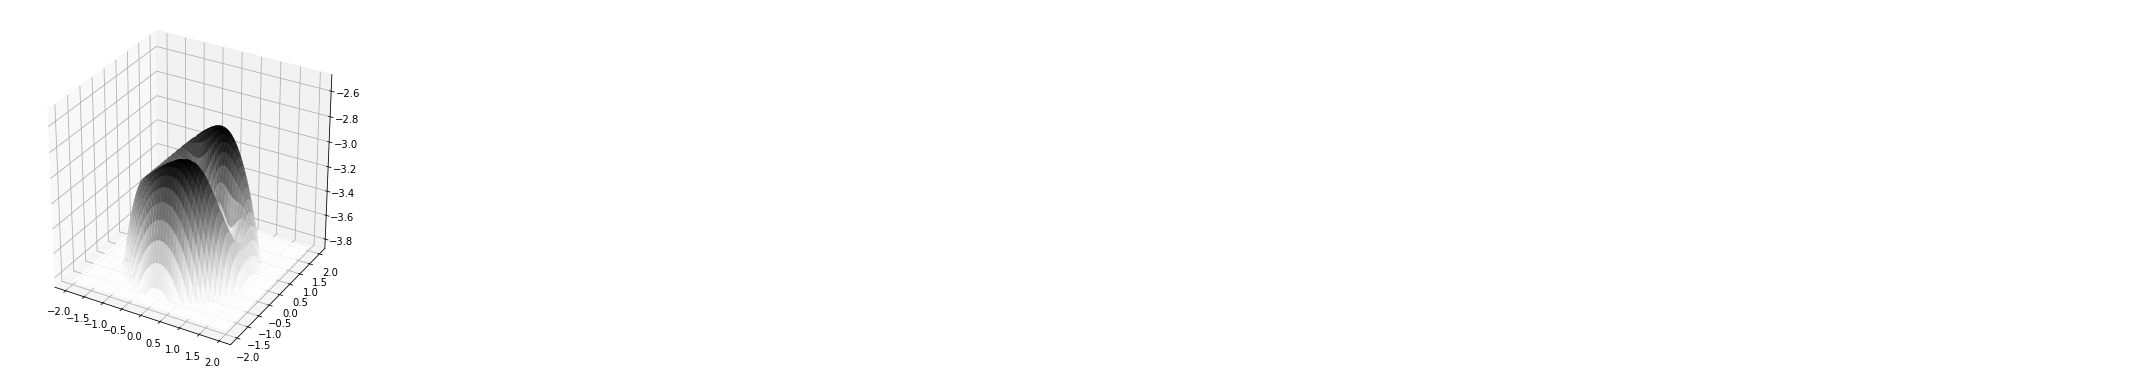

In [8]:
plotSurface(0.2);

<a id='roche'></a>

## Roche Lobes

The contour passing through the L1 Lagrange point has a particular significance for close binary star systems and forms the **Roche lobes** which meet at L1.

As a star (typically the more masive, shorter lived one) runs out of core hydrogen and moves to the red giant branch, it can expand enough to overflow its Roche lobe and transfer mass through L1 to the companion star.

An accurate calculation of the contour is, as we saw above, non-trivial. There have been various attempts to find a simpler approximation, including this one by Eggleton ([ApJ 268: 368-9, 1983](http://adsabs.harvard.edu/abs/1983ApJ...268..368E))
$$ R_L \approx \frac{0.5 q^{-2/3}}{0.6 q^{-2/3} + \ln (1 + q^{-1/3})}\ a $$
where $q$ is the mass ratio.

In [9]:
def approxRL(q, a):
    return 0.5*q**(-2/3) / (0.6*q**(-2/3) + np.log(1 + q**(-1/3))) * a

We can create an interactive plot that combines the L1 contour with the Eggleton approximation. Note that the parameter is now $q$ rather than $\mu$, with the transformations
$$ q = \frac{m_2}{m_1} = \frac{\mu}{1-\mu} \qquad \mu = \frac{q}{1-q} $$

Note that there is another, outer contour at the same level (most visible at very low values of $q$). This isn't relevant to a discussion of Roche lobes, but it can't easily be suppressed from the contour plot.

In [10]:
def plotRoche(q):
    mu = fix_mu(q/(1+q))
            
    #calculate the coordinates of L1-L5
    pts = location(mu)
    
    # calculate levels for plotting
    c1 = czv(pts['L1'], mu)
    
    # set up a meshgrid for the plot
    delta = 0.005
    x = np.arange(-1.2, 1.2, delta)
    y = np.arange(-1, 1, delta)
    X, Y = np.meshgrid(x, y)
    Z = czv((X, Y), mu)
    
    # create the contour plot
    fig, ax = plt.subplots(figsize=(8,8))
    plt.axis('equal')
    CS = ax.contour(X, Y, Z, (c1,))
    
    # add bodies (yellow-ish)
    ax.plot(-mu, 0,'yo',markersize=20)
    ax.text(-mu,0.1,'m1')
    ax.plot(1-mu, 0,'yo',markersize=20)
    ax.text(1-mu,0.1,'m2')
    
    # add Roche lobe approximation
    r_RL = approxRL(q, 1)
    circle = plt.Circle((-mu, 0), r_RL, color='r', alpha=0.4)
    ax.add_artist(circle)
    
    x,y = pts['L1']
    ax.plot(x,y,'ko',markersize=10)
    ax.text(x+0.08,y,'L1')
    ax.set_title('Roche Lobes, q = %.2f'%(q,), fontsize=16);
        
interact(plotRoche, q=w.FloatSlider(description="q",
                                            min=0.01, max=1.0, step=0.01, 
                                            continuous_update=False,
                                            value=0.3));   

interactive(children=(FloatSlider(value=0.3, continuous_update=False, description='q', max=1.0, min=0.01, step…

Pretty good, providing the mass ratio isn't too extreme.

<a id='refs'></a>

## References

- Murray and Dermott, "Solar System Dynamics", chapter 3. In particular, the calculations are based on Mathematica code the authors provided at http://ssdbook.maths.qmul.ac.uk/addinfo/notebook.html (figures 3.7 and 3.8).
- Keeton, "Principles of Astrophysics", Section 6.1 and Appendix A.3